### Базовые алгоритмы “машинного обучения” и  их имплементация с помощью Python

Всем привет, меня зовут Хворостяный Вячеслав. Я работаю аналитиком в компании “Ring Ukraine”, в свободное время занимаюсь изучением алгоритмов “машинного обучения”, являюсь Python энтузиастом. В этой статье я хотел бы поделится с вами примером имплементации базовых алгоритмов МЛ с помощью Python, а также провести их краткий обзор.

Разработки в сфере “машинного обучения” шагнули вперед с ошеломляющей, космической скоростью, уже сейчас можно применять сложнейшие алгоритмы не особо вникая в суть того, что происходит “под капотом”. Но даже самые сложные системы состоят из атомарных, простейших частиц, которые взаимодействуют между собой.

Каждый из нас уже что-то слышал об “искусственном интеллекте”, ИИ повсюду, это не новость, прямо сейчас пока я набираю этот текст, алгоритм подсказывает мне где я делаю ошибки и помогает мне подобрать слова, тоже самое происходит когда вы набираете текст у себя на смартфоне. Алгоритмы работают на нас когда мы ищем что-то в интернете, читаем почту, смотрим видео на Youtube, ставим лайки в соцсетях. Идеи эти не новы, например старушка Линейная Регрессия, которая будет рассмотрена ниже, впервые была использована Френсисом Гальтоном более 130 лет назад.

В этой статье мы попытаемся разобраться в “атомах” из которых состоят эти сложные системы, немного развеять магическую дымку, опутывающую изменения, принесенные в наш мир “машинным обучением” и “искусственным интеллектом”. 


#### Одномерная линейная регрессия


Данный алгоритм является одним из самых широко используемых алгоритмов МЛ, а также самым прозрачным  и интерпретируемым. Скорей всего вы уже стыкались с ним в повседневной жизни, а может и применяли на практике. Линейная регрессия это алгоритм позволяющий отобразить линейную зависимость между двумя переменными, выражается формулой:

\begin{equation}
h^{(i)} = \beta_0 + \beta_1x^{(i)} \\
\tag{1}
\end{equation}
где $h$ - предположение(hypothesis), $(\beta_0, \beta_1)^T$- вектор параметров, в котором и заключается вся магия, $x$ - независимая переменная

Вся суть в том, чтобы как можно лучше подобрать параметры $\beta_0$ и $\beta_1$ при заданном $x$, при этом $h$ будет отображать ожидаемое значение функции.

Линейная регрессия относится к так називаемому "обучению с учителем" или "supervised machine learning", это значит, что 
у нас уже есть некоторое количество данных где известны как заначение аргументов функции $x$ , так и значения самой функции $y$, наша задача состоит в том чтобы "обучится" на этих, уже размеченых данных, а потом применяя полученый вектор параметров к любому случайному $x$, получать соответствующий $y$.

Имея $x$ и $y$ мы можем расчитать интересующие нас параметры за формулами:

\begin{equation}
\beta_1 = \frac{\sum_{i=1}^{m} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{m} (x_i - \bar{x})^2}
\tag{2}
\end{equation} 

\begin{equation}
\beta_0 = \bar{y} - \beta_1\bar{x}
\end{equation}

Где $\bar{x}$, $\bar{y}$- математическое ожидание от векторов $X$ и $Y$

Данные формулы являются частным случаем метода наименших квадратов, к которому мы еще вернемся, более подробно об о том как выводятся эти формулы можно узнать перейдя по ссылке https://www.wikiwand.com/en/Ordinary_least_squares


Имплементация на Python:

```python
import numpy as np
from matplotlib import pyplot as plt 

def ord_LinReg_fit(X,Y):
    x_mean = np.mean(X)
    y_mean = np.mean(Y)

    m = len(X)

    number = 0
    denom  = 0
    for i in range(m):
        number += (X[i] - x_mean)*(Y[i] - y_mean)
        denom += (X[i] - x_mean)**2

    b_1 = number/denom
    b_0 = y_mean - (b_1*x_mean)
    return b_0,b_1

# Допустим мы хотим изучить зависимость веса мозгов Y от обьема черепной коробки X
X = np.array([3443, 3993, 3640, 4208, 3832, 3876, 3497, 3466, 3095, 4424]) # см^3
Y = [1340, 1380, 1355, 1522, 1208, 1405, 1358, 1292, 1340, 1400] # граммы

b0,b1 = ord_LinReg_fit(X,Y) # вычислeние параметров
H = b0 + b1 * X

# Визуализация
plt.plot(X,H, c='b', label='Regression Line')
plt.scatter(X, Y, c='g', label='Known values')
```
![image.png](lin_reg.png)


#### Многомерная линейная регрессия

Многомерную линейную регрессию можно рассматривать как обобщение одномерной, данной выше.


\begin{equation}
H = \beta_0x_0 + \beta_1x_1 + \beta_2x_2 + … + \beta_nx_n
\label{eq:eq_3}
\tag{3}
\end{equation}

\begin{equation}
x_0 = 1 
\end{equation}

Единственное измение состоит в том, что для удобства расчета к первому параметру $\beta_0$ была добавлена еще одна независимая переменная $x_0$, равна единице.

Уравнение $\eqref{eq:eq_3}$ можно записать в свернутом виде как:
\begin{equation}
H = \theta^TX
\label{eq:eq_4}
\tag{4}
\end{equation}

Где 
\begin{equation}
\theta = [ \beta_0 + \beta_1 + \beta_2 + … + \beta_n ] \\
X = [ x_0 + x_1 + x_2 + … + x_n]
\end{equation}



Согласно методу наименьших квадратов, вектор параметров можно получить путем решения нормального уравнения
\begin{equation}
\theta = (X^{T}*X)^{-1}X^{T}Y
\tag{5}
\end{equation}
где $\theta$ - вектор параметров

Имплементация на Python:
```python
import numpy as np
from matplotlib import pyplot as plt

def get_X_with_ones(X):
    """добавляем столбик едениц"""
    m = len(X)
    X = np.c_[np.ones(m),X]
    return X

def LSM_fit(X,Y):
    X_inv = np.linalg.inv(np.matmul(X.T,X))
    middle_res = np.matmul(X_inv,X.T)
    theta = np.matmul(middle_res,Y)
    return theta

X = [3443, 3993, 3640, 4208, 3832, 3876, 3497, 3466, 3095, 4424] # см^3
Y = [1340, 1380, 1355, 1522, 1208, 1405, 1358, 1292, 1340, 1400] # граммы 

X_ = get_X_with_ones(X)
theta = LSM_fit(X_,Y)
H = X_.dot(theta.T)
# Визуализация
plt.plot(X,H, c='b', label='Regression Line')
plt.scatter(X, Y, c='g', label='Known values')
```
![image.png](LSM.png)

У этого подхода есть несколько недостатков:  
 - Не во всех случаях матрица $(X^{T}*X)^{-1}$ существует
 - При большом количестве независимых переменных этот способ требует большой вычислительной мощности  

Поэтому на практике гораздо чаще можно встретить другой алгоритм вычесления вектора параметров, а именно
**градиентный спуск**.
###### Градиентный спуск и кост-функция
Градиентный спуск(gradient descent) - алгоритм оптимизации, который позволяет обновлять значения всех елементов вектора параметров одновременно.  
Градиент - это вектор частных производных от $\theta$.  
Метод предполагает обновление вектора $\theta$ по всем параметрам, за $n$ шагов.  

\begin{equation}
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{\textrm{(i)}}) - y^{\textrm{(i)}})^2
\end{equation}

\begin{equation}
\theta_j := \theta_j - \alpha\frac{\partial}{\partial \theta_j} J(\theta)
\end{equation}

\begin{equation}
\theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_{j}^{(i)}
\end{equation}

Где  
$J(\theta)$ - кост-функция(cost function),  
$\alpha$ - так називаемый "шаг обучения"(learning rate), его нужно подобрать вручную, так, чтобы $J(\theta)$ достигала минимума при как можно меньшем количестве итераций.  
$h_\theta(x^{(i)}$ - гипотеза  
$y$ - истинное значение

Так как из $J(\theta) = 0$ вытекает, что гипотеза $h_\theta(x^{(i)})$
полностью совпадает из действительным значением $y$, задачу метода можно сформулировать как нахождение минимального значения $J(\theta)$ при наименьшем числе итераций.

Метод градиентного спуска широко используется в алгоримах "машинного обучения", в том числе и при построении "нейронных сетей".



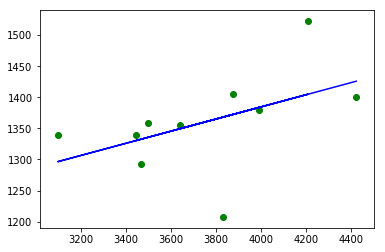

In [5]:
import numpy as np
from matplotlib import pyplot as plt 

def ord_LinReg_fit(X,Y):
    x_mean = np.mean(X)
    y_mean = np.mean(Y)

    m = len(X)

    number = 0
    denom  = 0
    for i in range(m):
        number += (X[i] - x_mean)*(Y[i] - y_mean)
        denom += (X[i] - x_mean)**2

    b_1 = number/denom
    b_0 = y_mean - (b_1*x_mean)
    return b_0,b_1

# Допустим мы хотим изучить зависимость веса мозгов Y от обьема черепной коробки X
X = np.array([3443, 3993, 3640, 4208, 3832, 3876, 3497, 3466, 3095, 4424]) # см^3
Y = [1340, 1380, 1355, 1522, 1208, 1405, 1358, 1292, 1340, 1400] # граммы

b0,b1 = ord_LinReg_fit(X,Y) # вычислeние параметров
H = b0 + b1 * X

# Визуализация
plt.plot(X,H, c='b', label='Regression Line')
plt.scatter(X, Y, c='g', label='Known values')

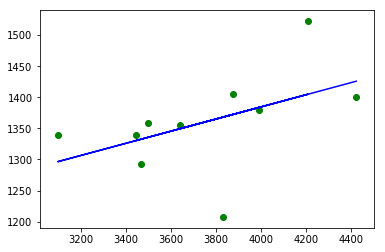

In [7]:
import numpy as np
from matplotlib import pyplot as plt

def get_X_with_ones(X):
    """добавляем столбик едениц"""
    m = len(X)
    X = np.c_[np.ones(m),X]
    return X

def LSM_fit(X,Y):
    X_inv = np.linalg.inv(np.matmul(X.T,X))
    middle_res = np.matmul(X_inv,X.T)
    theta = np.matmul(middle_res,Y)
    return theta

X = [3443, 3993, 3640, 4208, 3832, 3876, 3497, 3466, 3095, 4424] # см^3
Y = [1340, 1380, 1355, 1522, 1208, 1405, 1358, 1292, 1340, 1400] # граммы 

X_ = get_X_with_ones(X)
theta = LSM_fit(X_,Y)
H = X_.dot(theta.T)
# Визуализация
plt.plot(X,H, c='b', label='Regression Line')
plt.scatter(X, Y, c='g', label='Known values')